<b> Loading the libraries<b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import scipy.stats

<b> Load the Boston housing dataset <b>

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<h2>Visualization<h2>

<h3>For the "Median value of owner-occupied homes" provide a boxplot

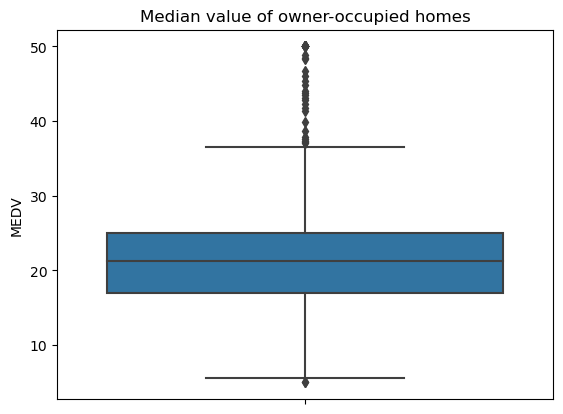

In [5]:
sns.boxplot(y='MEDV', data = boston_df)
plt.title("Median value of owner-occupied homes")
plt.show()

Outliers above the third quartile

<h3>Provide a  bar plot for the Charles river variable

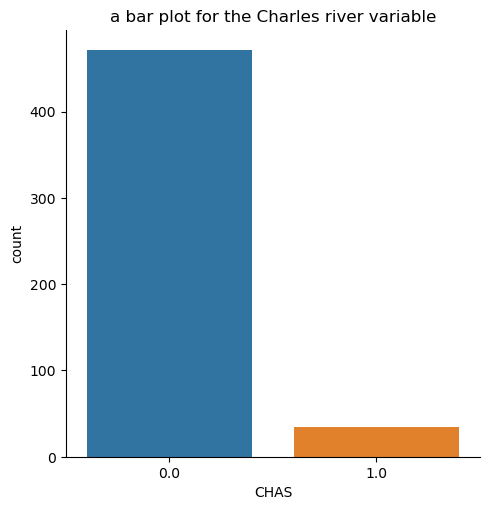

In [6]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title("a bar plot for the Charles river variable")
plt.show()

Most of the houses are not bound to Charles river

<h3>Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

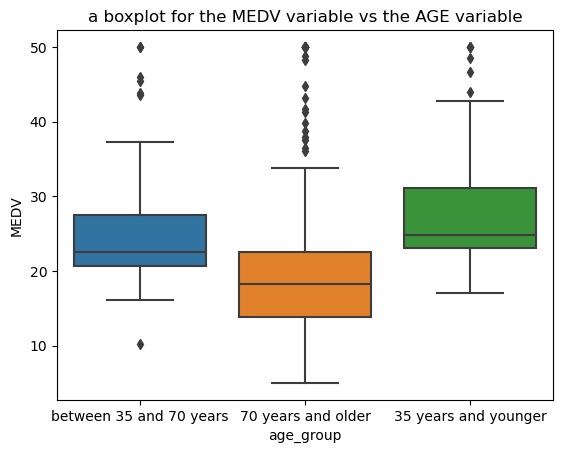

In [8]:
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("a boxplot for the MEDV variable vs the AGE variable")
plt.show()

Persons of 35 years or younger pays most for housing while >70 years pays the least.

<h3>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

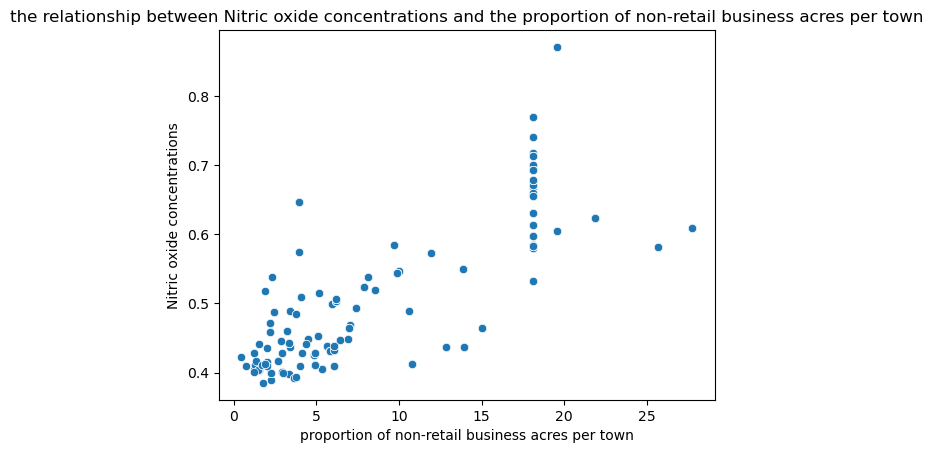

In [9]:
sns.scatterplot(y='NOX', x='INDUS', data=boston_df)
plt.title("the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Nitric oxide concentrations")
plt.show()
#The scatter plot shows a positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

There is a positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

<h3>Create a histogram for the pupil to teacher ratio variable

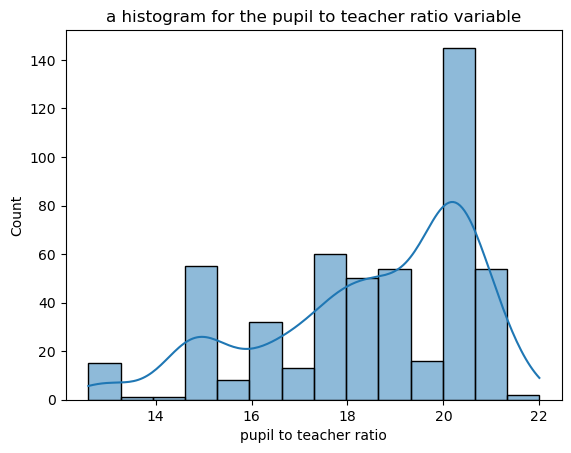

In [10]:
sns.histplot(x="PTRATIO", kde=True, data=boston_df)
plt.title("a histogram for the pupil to teacher ratio variable")
plt.xlabel("pupil to teacher ratio")
plt.show()

The histogram shows that the pupil teacher ratio is skewed to the right side.

<h2>Test of hypotheisis<h2>

<h3>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis<br>$H\_0: µ\_1 = µ\_2$ (There is no difference in median value of houses bounded by the Charles river)<br>
$H\_1: µ\_1 ≠ µ\_2$ (There is difference in median value of houses bounded by the Charles river)

Test for equality of variance

In [11]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                  boston_df[boston_df['CHAS']==1]['MEDV'], center='mean')

#Since the p-valuse is lower than 0.05, we can assume no equality of variance

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since the p-value is less than 0.05, the variance are not equal.

In [12]:
# t-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                  boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.


<h3>
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

First, we group the data into a new column. For this newly assigned group, our categories will be houses that are:

*   35 years and younger
*   between 35 and 70 years
*   70 years and older

In [13]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Test for equality of variance

In [14]:
scipy.stats.levene(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                  boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                  boston_df[boston_df['age_group']=='70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, we can assume equality of variance.

Now, run a one-way ANOVA

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                  boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                  boston_df[boston_df['age_group']=='70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

<h3>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [18]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

<h3>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [20]:
X=boston_df['DIS']
y=boston_df['MEDV']

X=sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        06:25:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of a positive impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes